# Clustering countries

This notebook clusters the various countries based on malaria deaths across the years 2000-2012.

## Import libraries and dataset

In [12]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, Birch
from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
np.random.seed(42)

In [13]:
malaria_deaths = pd.read_csv("../data/Malaria_deaths_across_time.csv")
malaria_deaths.head()

,Country,CountryCode,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,Latitude,Longitude
0,Angola,AGO,0.180668,0.179965,0.274212,0.733271,0.236692,0.261559,0.194156,0.186405,0.179813,0.200045,0.154147,0.131255,0.108970,-11.202692,17.873887
1,Argentina,ARG,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.416097,-63.616672
2,Azerbaijan,AZE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.143105,47.576927
3,Bangladesh,BGD,0.343356,0.333424,0.424229,0.407203,0.358253,0.355416,0.360381,0.161746,0.109250,0.033342,0.026248,0.025539,0.007804,23.684994,90.356331
4,Bhutan,BTN,0.502519,0.469018,0.368514,0.469018,0.234509,0.167506,0.234509,0.067003,0.067003,0.134005,0.067003,0.033501,0.033501,27.514162,90.433601


## Apply KMeans

I'll apply KMeans on the data and form the clusters.

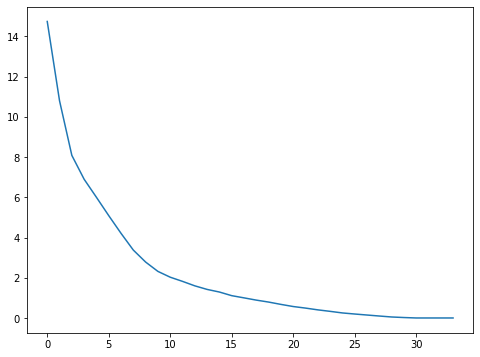

In [14]:
inertia = []

for cluster_count in range(1, malaria_deaths.shape[0]):
    kmeans = KMeans(cluster_count, init = 'k-means++', random_state = 42)
    kmeans.fit(malaria_deaths.iloc[:, 2:-2])
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (8, 6))
plt.plot(inertia)

The elbow in the curve is not very clear but it must be in the range 2-7.

I'll select 3 for this case.

## Plot Geoplot 

Finally, I'll plot these countries on a map and color them based on their cluster.

### KMeans

In [19]:
deaths_data = malaria_deaths.copy()

kmeans = KMeans(3, init = 'k-means++', random_state = 42)
kmeans.fit(deaths_data.iloc[:, 2:-2])
deaths_data['Cluster'] = kmeans.labels_
deaths_data['Cluster'] = deaths_data['Cluster'].astype('category')

fig = px.scatter_geo(deaths_data, 
                     locations="CountryCode",
                     color="Cluster",
                     text = 'Country',
                     projection="natural earth",
                     title = 'Countries clustered by the number of Malaria Deaths<br>from 2000 to 2012')
fig.show()

### AffinityPropagation

In [5]:
deaths_data = malaria_deaths.copy()

ap = AffinityPropagation(random_state = 42)
ap.fit(deaths_data.iloc[:, 2:-2])
deaths_data['Cluster'] = ap.labels_
deaths_data['Cluster'] = deaths_data['Cluster'].astype('category')

fig = px.scatter_geo(deaths_data, 
                     locations="CountryCode",
                     color="Cluster",
                     text = 'Country',
                     projection="natural earth",
                     title = 'Countries clustered by the number of Malaria Deaths<br>from 2000 to 2012')

fig.show()

### MeanShift

In [6]:
deaths_data = malaria_deaths.copy()

meanshift = MeanShift()
meanshift.fit(deaths_data.iloc[:, 2:-2])
deaths_data['Cluster'] = meanshift.labels_
deaths_data['Cluster'] = deaths_data['Cluster'].astype('category')

fig = px.scatter_geo(deaths_data, 
                     locations="CountryCode",
                     color="Cluster",
                     text = 'Country',
                     projection="natural earth",
                     title = 'Countries clustered by the number of Malaria Deaths<br>from 2000 to 2012')

fig.show()

### Birch

In [7]:
deaths_data = malaria_deaths.copy()

birch = Birch(n_clusters = 3)
birch.fit(deaths_data.iloc[:, 2:-2])
deaths_data['Cluster'] = birch.labels_
deaths_data['Cluster'] = deaths_data['Cluster'].astype('category')

fig = px.scatter_geo(deaths_data, 
                     locations="CountryCode",
                     color="Cluster",
                     text = 'Country',
                     projection="natural earth",
                     title = 'Countries clustered by the number of Malaria Deaths<br>from 2000 to 2012')

fig.show()